In [1]:
%load_ext autoreload
%autoreload 2

In [3]:
import torch
from matplotlib import pyplot as plt

# from lab1.brownian_motion import device
from lab_one import (EulerMaruyamaSimulator, OUProcess,
                          plot_scaled_trajectories_1d)


In [4]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

100%|██████████| 999/999 [00:00<00:00, 91533.08it/s]


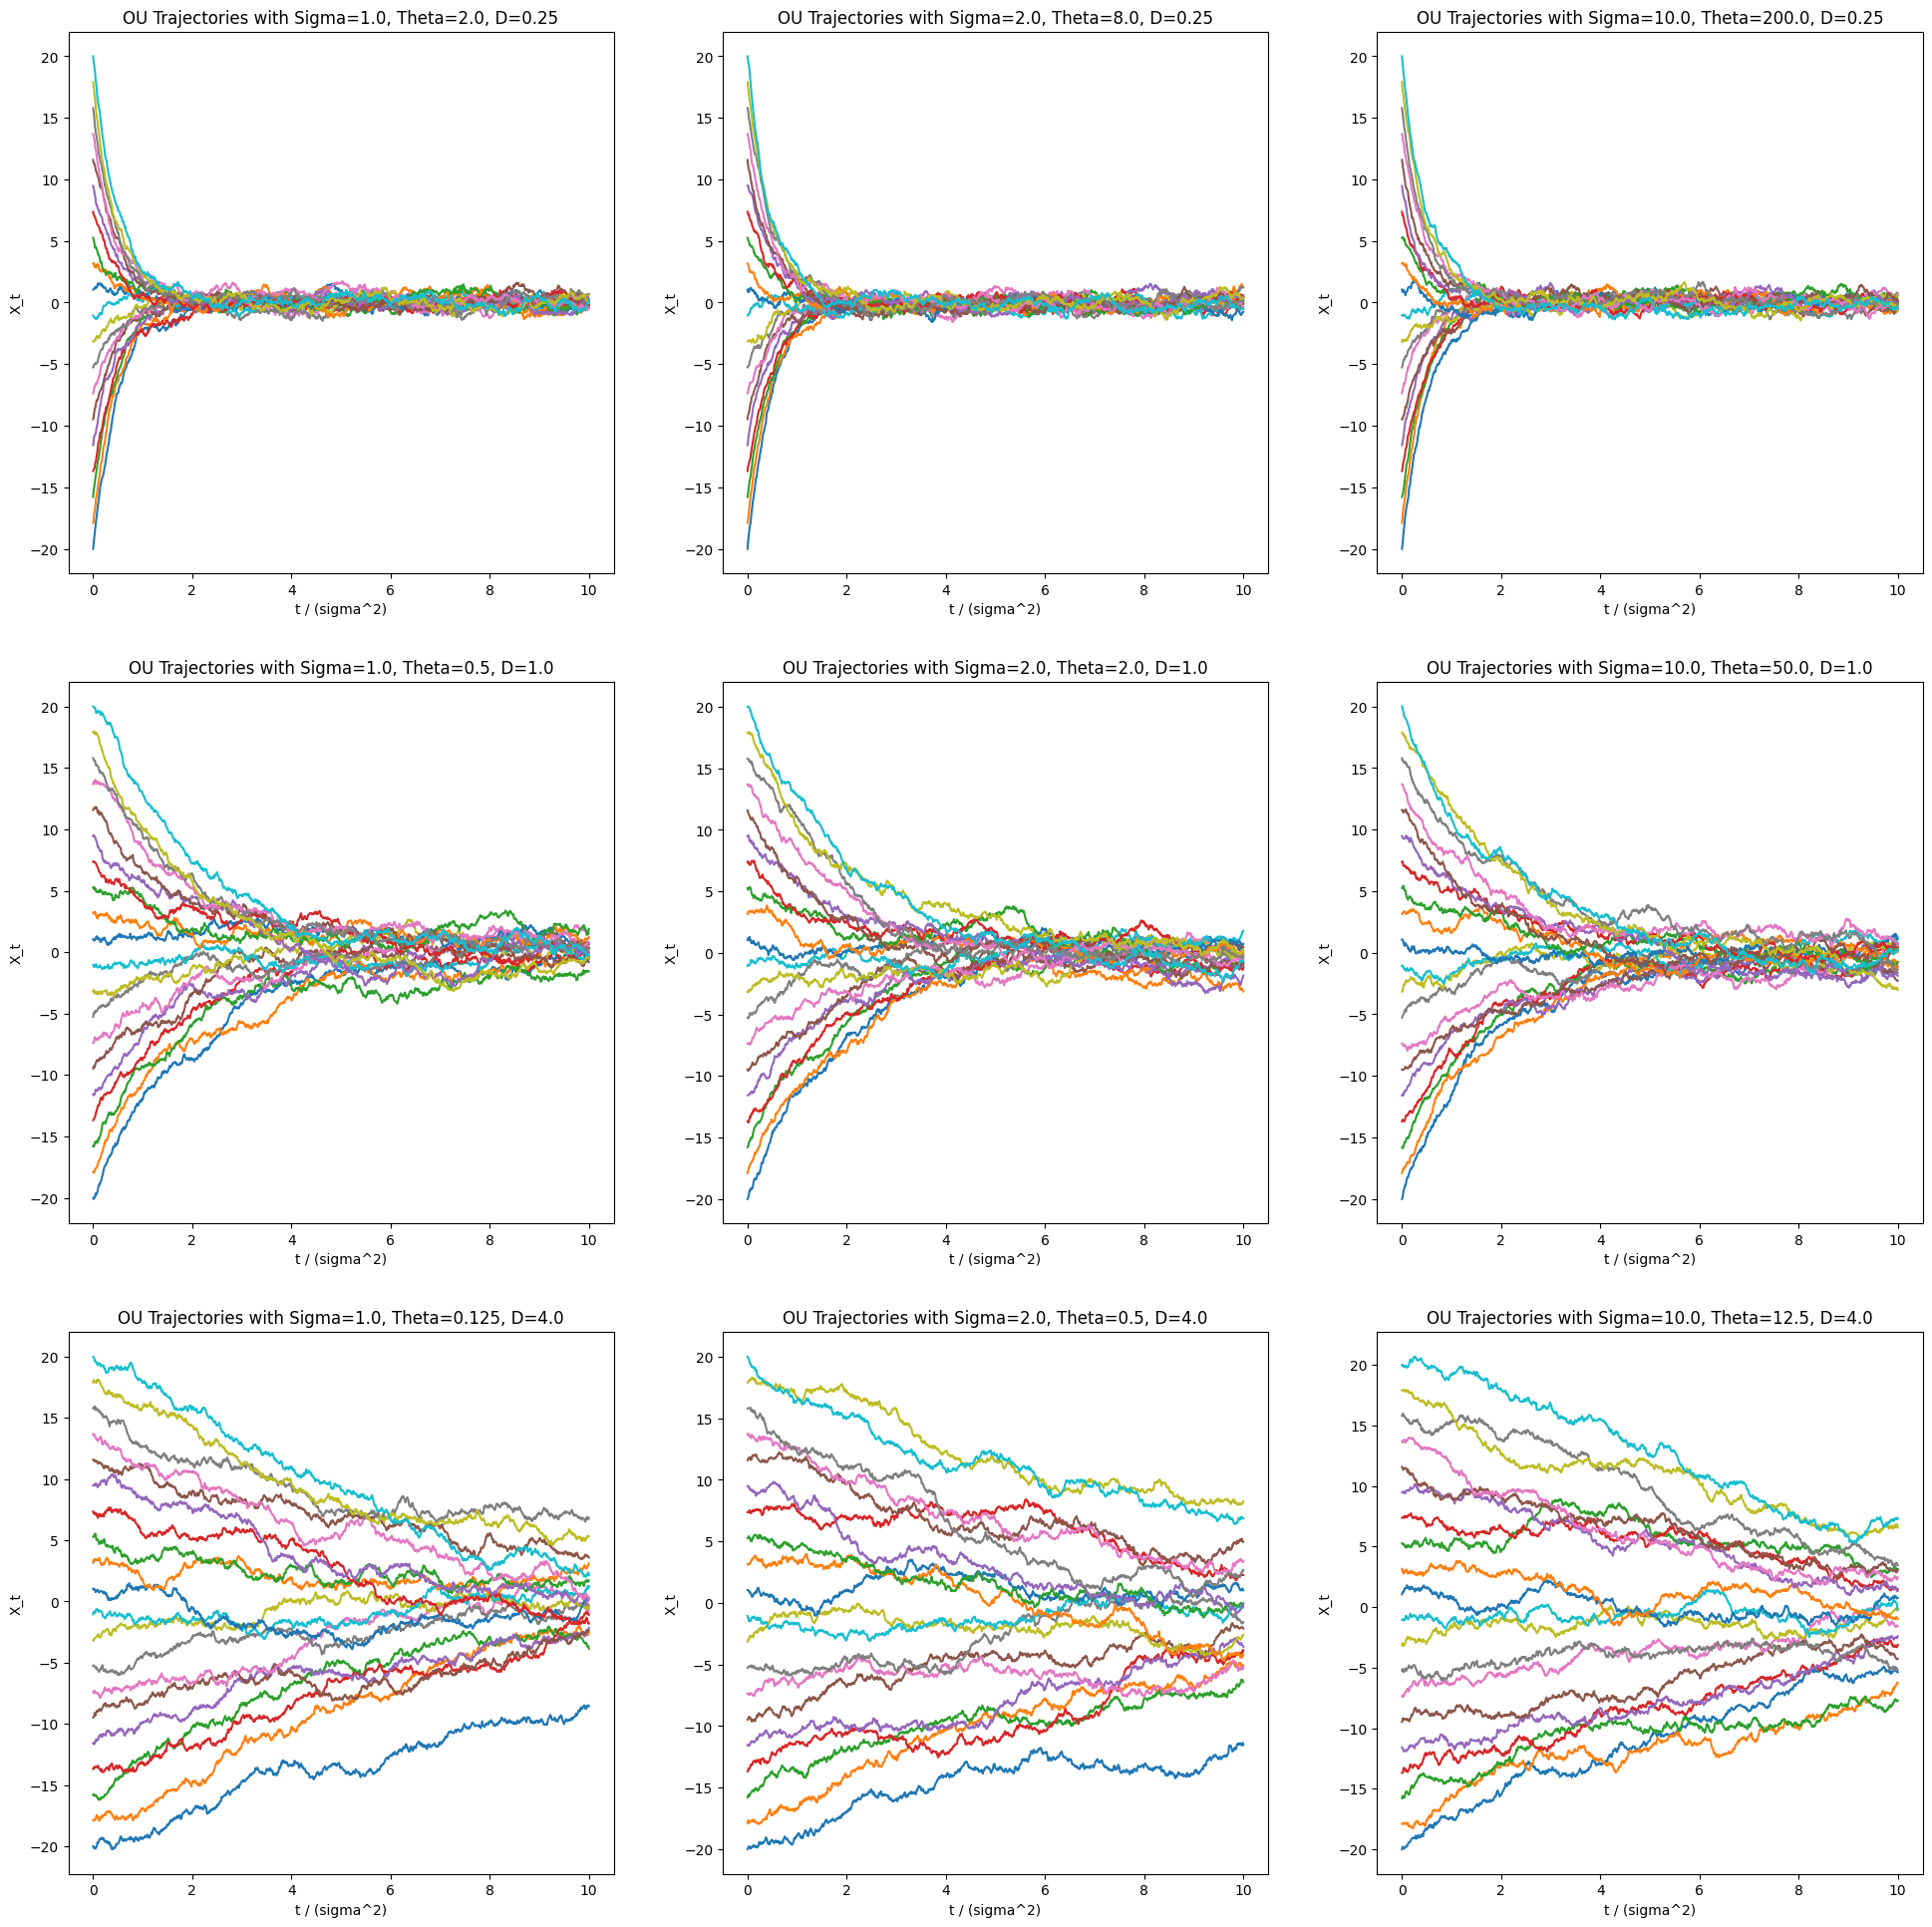

In [5]:
# Let's try rescaling with time
sigmas = [1.0, 2.0, 10.0]
ds = [0.25, 1.0, 4.0]  # sigma**2 / 2t
simulation_time = 10.0

fig, axes = plt.subplots(len(ds), len(sigmas), figsize=(8 * len(sigmas), 8 * len(ds)))
axes = axes.reshape((len(ds), len(sigmas)))
for d_idx, d in enumerate(ds):
    for s_idx, sigma in enumerate(sigmas):
        theta = sigma**2 / 2 / d
        ou_process = OUProcess(theta, sigma)
        simulator = EulerMaruyamaSimulator(sde=ou_process)
        x0 = torch.linspace(-20.0, 20.0, 20).view(-1, 1).to(device)
        time_scale = sigma**2
        ts = torch.linspace(0.0, simulation_time / time_scale, 1000).to(device)  # simulation timesteps
        ax = axes[d_idx, s_idx]
        plot_scaled_trajectories_1d(x0=x0, simulator=simulator, timesteps=ts,
                                    time_scale=time_scale, label=f'Sigma = {sigma}', ax=ax)
        ax.set_title(f'OU Trajectories with Sigma={sigma}, Theta={theta}, D={d}')
        ax.set_xlabel('t / (sigma^2)')
        ax.set_ylabel('X_t')
plt.show()

100%|██████████| 999/999 [00:00<00:00, 85787.31it/s]


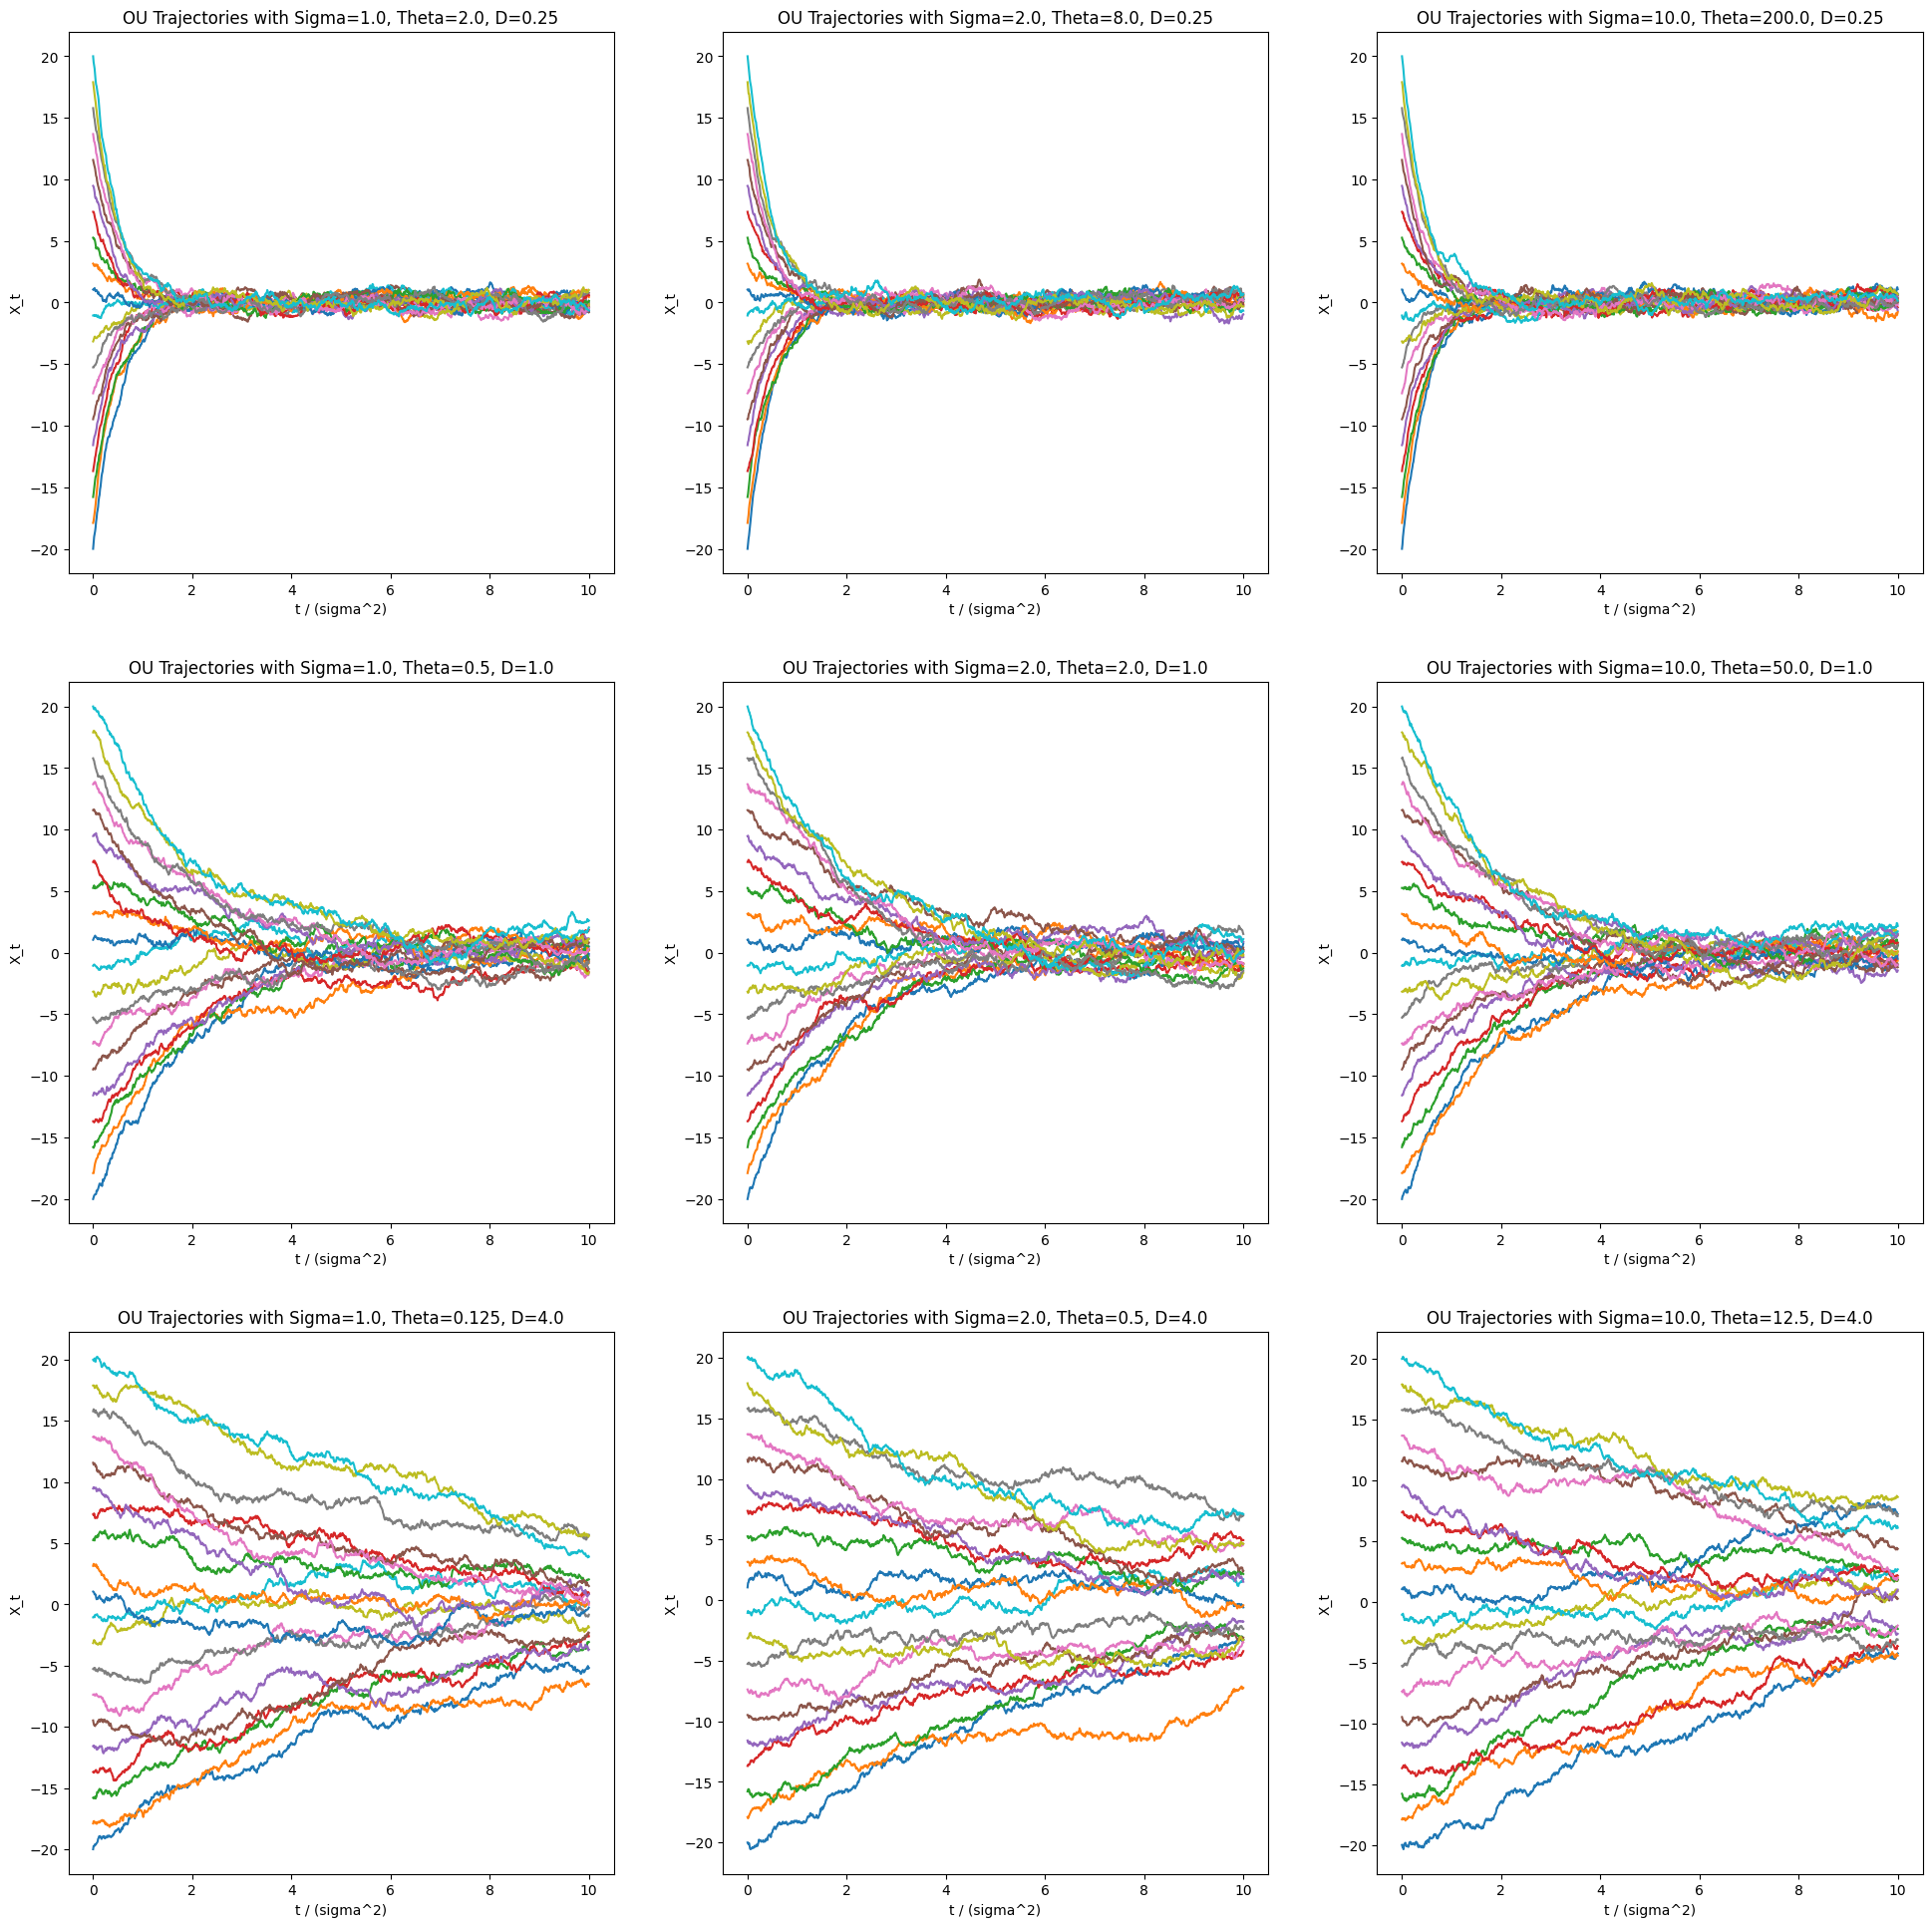

In [6]:
# Let's try rescaling with time
sigmas = [1.0, 2.0, 10.0]
ds = [0.25, 1.0, 4.0]  # sigma**2 / 2t
simulation_time = 10.0

fig, axes = plt.subplots(len(ds), len(sigmas), figsize=(8 * len(sigmas), 8 * len(ds)))
axes = axes.reshape((len(ds), len(sigmas)))
for d_idx, d in enumerate(ds):
    for s_idx, sigma in enumerate(sigmas):
        theta = sigma**2 / 2 / d
        ou_process = OUProcess(theta, sigma)
        simulator = EulerMaruyamaSimulator(sde=ou_process)
        x0 = torch.linspace(-20.0, 20.0, 20).view(-1, 1).to(device)
        time_scale = sigma**2
        ts = torch.linspace(0.0, simulation_time / time_scale, 1000).to(device)  # simulation timesteps
        ax = axes[d_idx, s_idx]
        plot_scaled_trajectories_1d(x0=x0, simulator=simulator, timesteps=ts,
                                    time_scale=time_scale, label=f'Sigma = {sigma}', ax=ax)
        ax.set_title(f'OU Trajectories with Sigma={sigma}, Theta={theta}, D={d}')
        ax.set_xlabel('t / (sigma^2)')
        ax.set_ylabel('X_t')
plt.show()